In [33]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [34]:
# MNIST is now provided via tf.keras.datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [35]:
print("Image Inventory")
print("----------")
print(f"Training: {x_train.shape[0]}")
print(f"Testing:  {x_test.shape[0]}")
print("----------")

Image Inventory
----------
Training: 60000
Testing:  10000
----------


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Normalize pixel values (TF 2.x best practice)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Convert labels to one-hot (replacement for one_hot=True)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

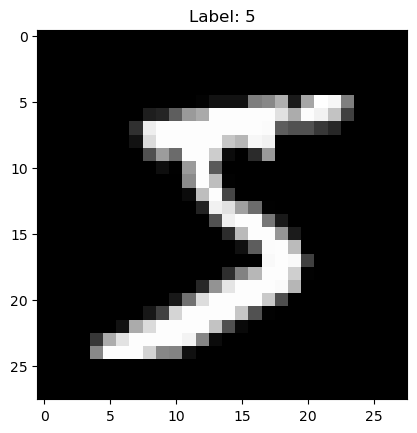

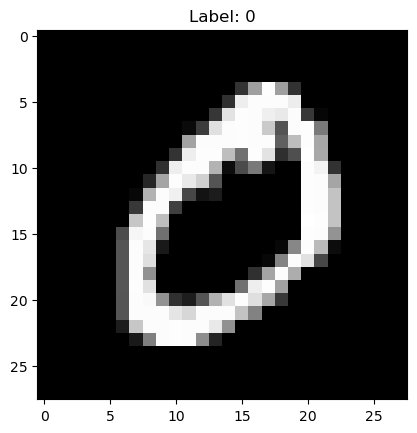

In [37]:
for i in range(2):
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.show()

In [38]:
x_train = x_train[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # softmax replaces sigmoid for multiclass
])

In [40]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9179 - loss: 0.2806 - val_accuracy: 0.9727 - val_loss: 0.0963
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9772 - loss: 0.0778 - val_accuracy: 0.9807 - val_loss: 0.0621
Epoch 3/5
  7/118 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9846 - loss: 0.0556

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss * 100:.2f}%")

In [ ]:
model.summary()